In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# Load the dataset
data = pd.read_csv('ProjectCompletionData.csv')
data = data.drop(["ID","Team Velocity (History)","Sprint Start Date"],axis=1)
data.head()

,Sprint Length (wks),Tasks Planned,Story Points Planned,Blockers,Team Members,Tasks Completed,Story Points Completed
0,2,10,20,2,5,9,18
1,2,12,24,1,5,11,22
2,2,11,22,3,5,10,20
3,2,13,26,2,5,12,23
4,2,14,28,4,6,13,25


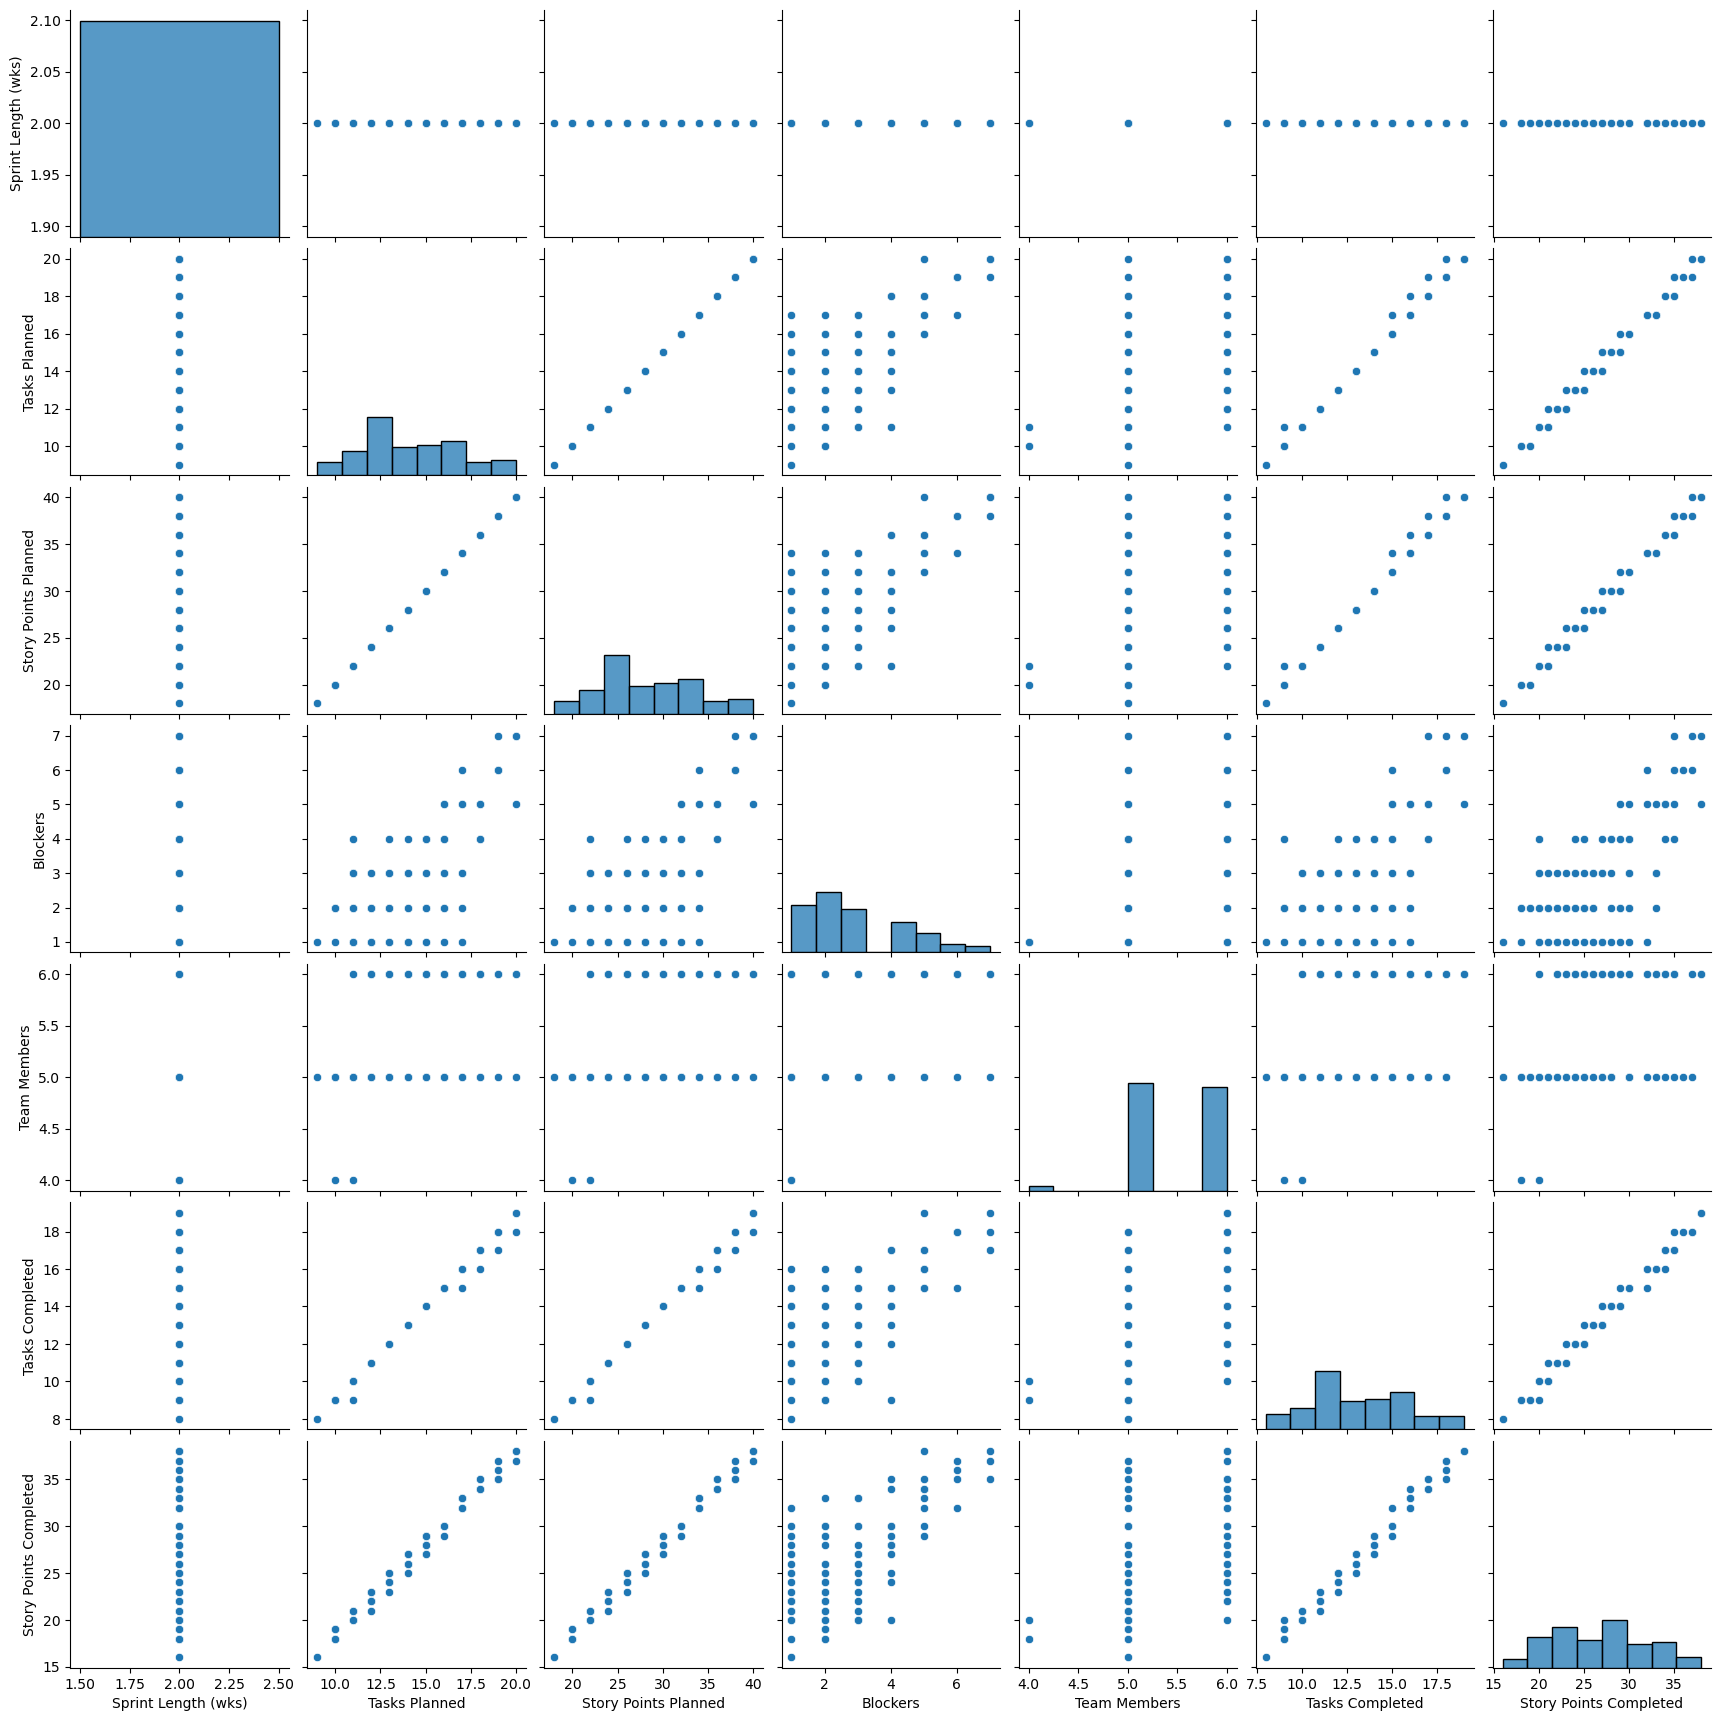

In [9]:
# Pairplot to visualize the relationships between features
sns.pairplot(data)
plt.show()

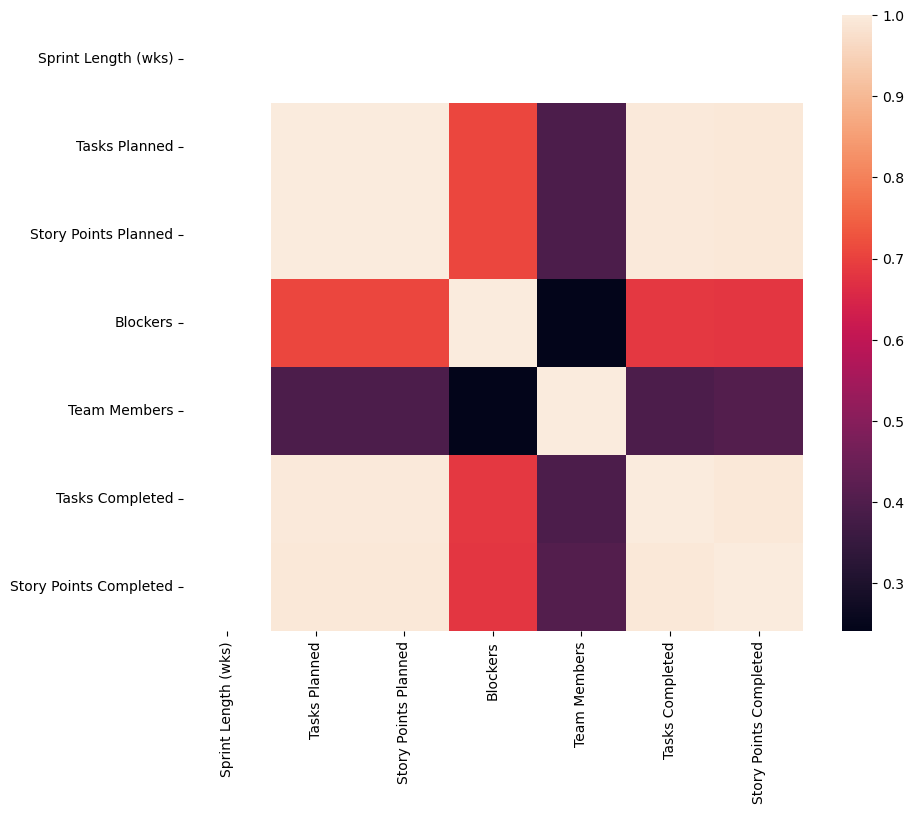

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
# Assuming 'data' is your DataFrame
X = data.drop(['Tasks Completed', 'Story Points Completed'], axis=1)
y = data[['Tasks Completed', 'Story Points Completed']]
# Splitting the data into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the train+val into train and val sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [17]:
# Building the model
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
layers.Dense(32, activation='relu'),
layers.Dense(2) # Output layer: Tasks Completed, Story Points Completed
])
# Compiling the model
model.compile(optimizer='adam',
loss='mse',
metrics=['mae', 'mse'])
# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,530 (9.88 KB)

 Trainable params: 2,530 (9.88 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training the model
history = model.fit(
X_train, y_train,
epochs=100,
validation_data=(X_val, y_val),
verbose=1 # or use verbose=0 for no output during training
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 742ms/step - loss: 450.3619 - mae: 19.0142 - mse: 451.0749 - val_loss: 446.1951 - val_mae: 18.9608 - val_mse: 446.1951
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 388.7509 - mae: 17.7648 - mse: 389.5904 - val_loss: 379.8767 - val_mae: 17.5965 - val_mse: 379.8767
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 327.8451 - mae: 16.4015 - mse: 328.2396 - val_loss: 321.2525 - val_mae: 16.2918 - val_mse: 321.2525
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 267.7475 - mae: 14.9000 - mse: 266.7692 - val_loss: 271.0352 - val_mae: 15.0554 - val_mse: 271.0352
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 233.0378 - mae: 13.9942 - mse: 233.3893 - val_loss: 226.1419 - val_mae: 13.8505 - val_mse: 226.1419
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 197.3123 - mae: 12.9999 - mse: 198.1494 - val_loss: 186.1765 - val_mae: 12.6897 - val_mse: 186.1765
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step 

In [20]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_results[0]}, Test MAE: {test_results[1]}, Test MSE:{test_results[2]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.3438 - mae: 0.4664 - mse: 0.3438
Test Loss: 0.3438006043434143, Test MAE: 0.4663560390472412, Test MSE:0.3438006043434143


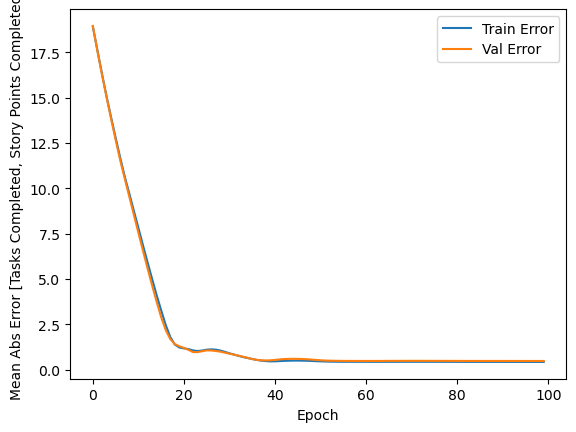

In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Tasks Completed, Story Points Completed]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()
    plt.show()
plot_history(history)

In [25]:
# Parsing and preprocessing the input data
team_velocity_history = np.array([15, 18, 20, 22, 25])
#scaled_features = scaler.transform([[2, 25, 40, 3, 5]])  # Example scaling

# Assuming your ensemble model is ready and named `ensemble_model`
# And you have functions or steps to prepare the LSTM and MLP inputs correctly
prediction = model.predict([team_velocity_history.reshape(1, -1)])

print(f"Predicted Tasks Completed: {prediction[0,0]}")
print(f"Predicted Story Points Completed: {prediction[0,1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted Tasks Completed: 17.316518783569336
Predicted Story Points Completed: 28.694194793701172
